# Imports

In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# 1. Load data

In [2]:
df = pd.read_csv('tagesschau.csv', encoding='utf-8')
df.head()

,Text,Label,Date,Link
0,Das Datenleck auf dem IT-System des NRW-Schulm...,web,02.05.2023,https://www.tagesschau.de/inland/regional/nord...
1,"Die Berliner Polizei bilanziert einen ""erstaun...",web,02.05.2023,https://www.tagesschau.de/inland/regional/bran...
2,Der Dresdner Musikfotograf Matthias Creutziger...,web,02.05.2023,https://www.tagesschau.de/inland/regional/sach...
3,Tanz in den Mai • Verletzte bei Hausbrand in V...,web,30.04.2023,https://www.tagesschau.de/inland/regional/nord...
4,Nach Space Shuttle und Concorde jetzt nochmal ...,web,29.04.2023,https://www.tagesschau.de/inland/regional/rhei...


In [3]:
len(df)

3924

# 2. Remove nan and duplicates from dataset

In [4]:
# Remove nan
df = df.dropna(subset=['Text'])
len(df)

3831

In [5]:
# Remove duplicates but keep first duplicate occurrence
df = df.drop_duplicates(subset='Text', keep='first')
len(df)

3816

# 3. Explore dataset

## 3.1 Label distribution

In [6]:
label_dist = Counter(df['Label'].tolist())
dict(label_dist)

{'web': 125,
 'panorama': 587,
 'ausland': 548,
 'wirtschaft': 467,
 'sport': 505,
 'inland': 433,
 'etat': 243,
 'wissenschaft': 487,
 'kultur': 421}

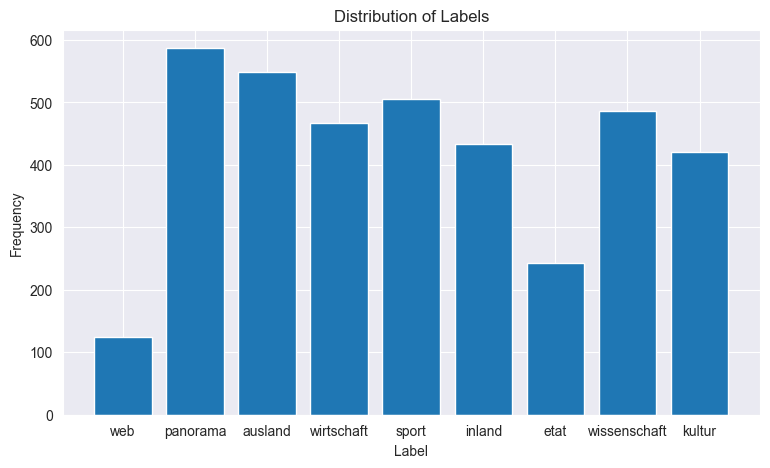

In [7]:
labels = label_dist.keys()
counts = label_dist.values()

plt.figure(figsize=(9, 5))
plt.bar(labels, counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Distribution of Labels')
plt.show()

## 3.2 Distribution of text lengths

In [8]:
tokenizer = RegexpTokenizer(r'\w+')
df['text_tokenized'] = df['Text'].apply(lambda x: tokenizer.tokenize(x))

In [9]:
df['text_length'] = df['text_tokenized'].apply(lambda x: len(x))

In [10]:
df.head()

,Text,Label,Date,Link,text_tokenized,text_length
0,Das Datenleck auf dem IT-System des NRW-Schulm...,web,02.05.2023,https://www.tagesschau.de/inland/regional/nord...,"[Das, Datenleck, auf, dem, IT, System, des, NR...",654
1,"Die Berliner Polizei bilanziert einen ""erstaun...",web,02.05.2023,https://www.tagesschau.de/inland/regional/bran...,"[Die, Berliner, Polizei, bilanziert, einen, er...",3223
2,Der Dresdner Musikfotograf Matthias Creutziger...,web,02.05.2023,https://www.tagesschau.de/inland/regional/sach...,"[Der, Dresdner, Musikfotograf, Matthias, Creut...",1256
3,Tanz in den Mai • Verletzte bei Hausbrand in V...,web,30.04.2023,https://www.tagesschau.de/inland/regional/nord...,"[Tanz, in, den, Mai, Verletzte, bei, Hausbrand...",821
4,Nach Space Shuttle und Concorde jetzt nochmal ...,web,29.04.2023,https://www.tagesschau.de/inland/regional/rhei...,"[Nach, Space, Shuttle, und, Concorde, jetzt, n...",583


In [18]:
df['text_length'].describe()

count    3816.000000
mean      546.450734
std       399.640482
min        25.000000
25%       310.000000
50%       479.000000
75%       687.250000
max      9316.000000
Name: text_length, dtype: float64

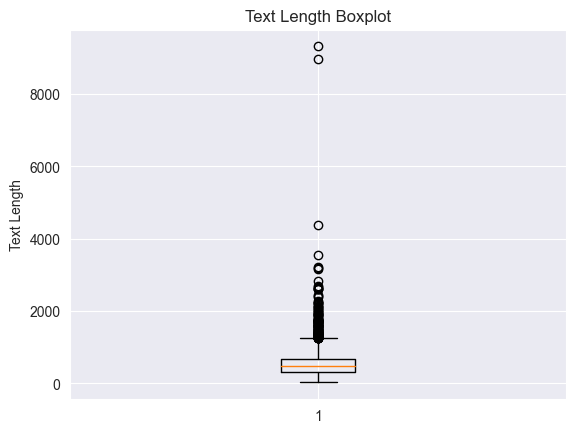

In [12]:
plt.boxplot(df['text_length'])
plt.ylabel('Text Length')
plt.title('Text Length Boxplot')
plt.show()

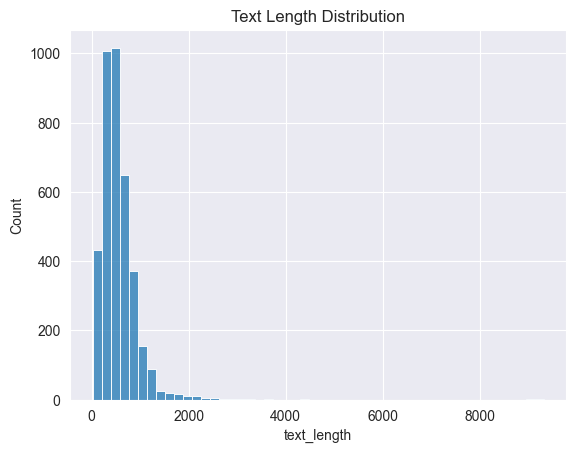

In [16]:
sns.histplot(data=df, x='text_length', bins=50)
plt.title('Text Length Distribution')
plt.show()